# csv ÌååÏùº Î°úÎìú.

In [434]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#option float show all 
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('vgames2.csv', index_col = 0)
#df.drop('Unnamed: 0', axis=1,inplace=True) 

df


Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS 2008.00   
2                                      The Munchables      Wii 2009.00   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP 2010.00   
4                    Deal or No Deal: Special Edition       DS 2010.00   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3 2010.00   
...                                               ...      ...     ...   
16594                         Ice Age 2: The Meltdown       GC 2006.00   
16595                     Rainbow Islands: Revolution      PSP 2005.00   
16596                                        NBA 2K16      PS3 2015.00   
16597                     Toukiden: The Age of Demons      PSV 2013.00   
16598                        The King of Fighters '95       PS 1996.00   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
1         Action                    Destineer     0.04        0        0   
2         Action           Namco Bandai Games     0.17        0        0   
3      Adventure                    Alchemist        0        0     0.02   
4           Misc                    Zoo Games     0.04        0        0   
5       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16594   Platform                Vivendi Games     0.15     0.04        0   
16595     Action            Rising Star Games     0.01        0        0   
16596     Sports         Take-Two Interactive     0.44     0.19     0.03   
16597     Action                   Tecmo Koei     0.05     0.05     0.25   
16598   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
1               0  
2            0.01  
3               0  
4               0  
5            0.04  
...           ...  
16594        0.01  
16595           0  
16596        0.13  
16597        0.03  
16598        0.01  

[16598 rows x 9 columns]

## Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú (EDA)


year error cnt = 371
pop cnt = 16598
0.02


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

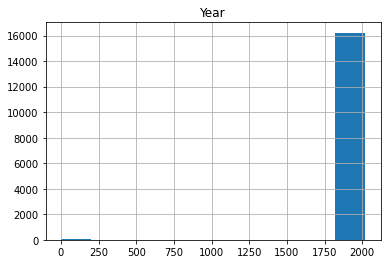

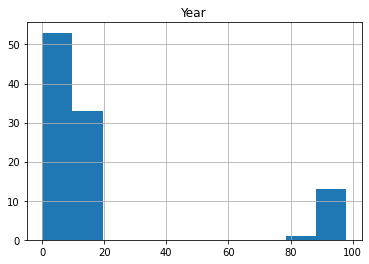

In [435]:
df_year_error= df[ (df['Year'].isnull()) | (df['Year'] < 250)]

print( 'year error cnt =',df_year_error.shape[0])
print( 'pop cnt =',df.shape[0])

print( round( df_year_error.shape[0] / df.shape[0] ,2))

# Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥∏ Í≤∞Í≥º
# Ïó∞ÎèÑÍ∞Ä Nan or 0Ïù∏ Í≤∞Ï∏°Ïπò, Í∑∏Î¶¨Í≥† 250 Ïù¥ÌïòÏùò Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Í∞Ä 
# Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞Ïùò 0.02%ÎùºÏÑú Ï†úÍ±∞ÌïòÍ∏∞Î°ú Í≤∞Ï†ïÌñàÏäµÎãàÎã§.

# histogram ÏúºÎ°ú 250Ïù¥ÌïòÏùò Í∞íÎèÑ Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌåêÎã®.  

df.hist( 'Year')
df_year_error.hist( 'Year') 

#Ï§ëÎ≥µÍ∞íÎèÑ Ï∞æÏïòÏúºÎÇò YearÏù¥ 0Ïù¥ÎØÄÎ°ú Í≤∞Ï∏°Ïπò Ï†úÍ±∞Ìï†Îïå Ìï®Íªò Ï†úÍ±∞. 
#df[df.duplicated()] 

In [436]:
df1 = df.copy()

# Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞.
del_con_byYear = df_year_error.index
df1.drop(del_con_byYear, inplace=True)


#Ïû•Î•¥Í≥†,ÌçºÎ∏îÎ¶¨ÏÖîÍ≥† ÏùºÎã® nan Ïù¥Î©¥ Ï†úÍ±∞. 
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace = True)


#year intÎ°ú Î≥ÄÌôò
df1['Year'] = df1['Year'].astype(int)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16141 non-null  object
 1   Platform     16141 non-null  object
 2   Year         16141 non-null  int32 
 3   Genre        16141 non-null  object
 4   Publisher    16141 non-null  object
 5   NA_Sales     16141 non-null  object
 6   EU_Sales     16141 non-null  object
 7   JP_Sales     16141 non-null  object
 8   Other_Sales  16141 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.0+ MB


In [437]:
# Ïà´ÏûêÎßå Îì§Ïñ¥ÏûàÏñ¥Ïïº Ìï† Ïª¨ÎüºÏóê M,KÎùºÎäî Ïä§Ìä∏ÎßÅÏù¥ Ï°¥Ïû¨
# Î≥¥ÌÜµ 100ÎßåÏùÑ M, 1000ÏùÑ KÎ°ú ÌëúÍ∏∞Ìï¥ÏÑú ÏÇ¨Ïö© Ìï®. 
# Ïà´ÏûêÎ°ú ÎåÄÏ≤¥ ÌïòÎäî ÏûëÏóÖ ÏãúÌñâ. 

sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'] 

# Î∞©Î≤ï 1.
# ÏùºÎã® ÏÇ≠Ï†ú
def delete_MK():
    
    s1 = set([])
    for v in sales:
        idx = df1[ (df1[v].str.count('M')>0) | (df1[v].str.count('K')>0) ].index
        s1.update(idx)
    #print(s1)
    #print( 'total=', len(s1) / df1.shape[0] )

    df1.drop( s1, inplace=True)
    df1.reset_index(drop=True,inplace = True)




# Î∞©Î≤ï2.
# M, KÎç∞Ïù¥ÌÑ∞ Îì§Ïñ¥ÏûàÎäî Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò.
def convertMK(ss):

    if type(ss) == float:
        pass
    
    elif ss.count('M')>0:
        ss = float(ss.split('M')[0])*1000000
    
    elif ss.count('K')>0:
        ss = float(ss.split('K')[0])*1000
    
    return float(ss) 

def change_MK():
    for c in sales:
        df1[c] = df1[c].apply(convertMK)        
        

#Î∞©Î≤ï1 
delete_MK()
#Î∞©Î≤ï2
#change_MK()

#Ïà´ÏûêÎ°ú ÌÉÄÏûÖÎ≥ÄÍ≤Ω
df1[sales] = df1[sales].astype(float)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15382 non-null  object 
 1   Platform     15382 non-null  object 
 2   Year         15382 non-null  int32  
 3   Genre        15382 non-null  object 
 4   Publisher    15382 non-null  object 
 5   NA_Sales     15382 non-null  float64
 6   EU_Sales     15382 non-null  float64
 7   JP_Sales     15382 non-null  float64
 8   Other_Sales  15382 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1021.6+ KB


In [438]:
# ÏßÄÏó≠Î≥Ñ ÌåêÎß§Îüâ...
df1[sales].sum()


NA_Sales      4055.22
EU_Sales      2251.70
JP_Sales      1192.14
Other_Sales    743.86
dtype: float64

In [439]:
#ÏßÄÏó≠Ïóê Îî∞ÎùºÏÑú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Í∞Ä Îã§Î•ºÍπå?
#ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑÏùÄ ÎßéÏù¥ ÌåîÎ¶∞ Í≤åÏûÑÏù¥ÎùºÍ≥† Í∞ÄÏ†ï.
#ÏßÄÏó≠Î≥Ñ ÎßéÏù¥ ÌåîÎ¶∞ Ïû•Î•¥Î≥Ñ ÎÇ¥Î¶ºÏ∞®Ïàú.

# - [x]  ÏßÄÏó≠ÏúºÎ°ú Í∑∏Î£πÌôî
# - [x]  ÎßéÏù¥ ÌåîÎ¶∞ Í≤åÏûÑ Ïàú Ï†ïÎ†¨
# - [x]  Ïñ¥ÎäêÏßÄÏó≠ÏóêÏÑú Ïñ¥Îñ§ Ïû•Î•¥Í∞Ä ÎßéÏù¥ ÌåîÎ†∏ÎäîÏßÄ ÏãúÍ∞ÅÌôî


df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']

salesAll =[x for x in sales]
salesAll.append('Total_Sales')
salesAll


df_Genre = df1.groupby('Genre')[salesAll].sum()
df_Genre

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre                                                               
Action          801.89    486.60    149.85       176.14      1614.48
Adventure        97.29     60.65     49.20        16.06       223.20
Fighting        210.51     94.18     82.58        34.33       421.60
Misc            380.36    200.14     99.47        69.97       749.94
Platform        410.96    184.11    121.88        47.88       764.83
Puzzle          118.40     49.95     56.16        12.13       236.64
Racing          334.14    222.66     50.60        73.48       680.88
Role-Playing    283.86    160.10    314.15        50.86       808.97
Shooter         544.63    293.38     36.53        96.68       971.22
Simulation      173.64    106.97     61.51        29.49       371.61
Sports          633.87    349.85    126.65       126.13      1236.50
Strategy         65.67     43.11     43.56        10.71       163.05

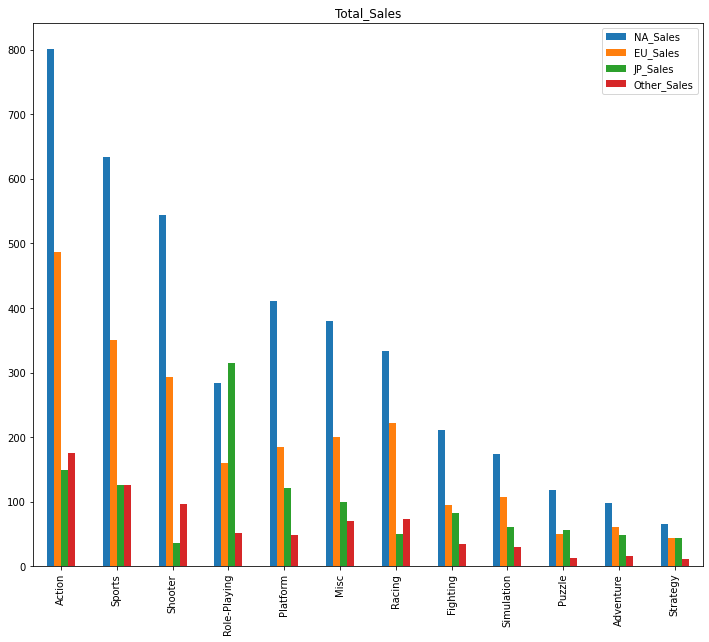

In [440]:
df_Genre.sort_values(by='Total_Sales',ascending=False,inplace=True)
df_Genre[sales].plot.bar( xlabel='', title='Total_Sales',figsize=(12,10))
plt.show();


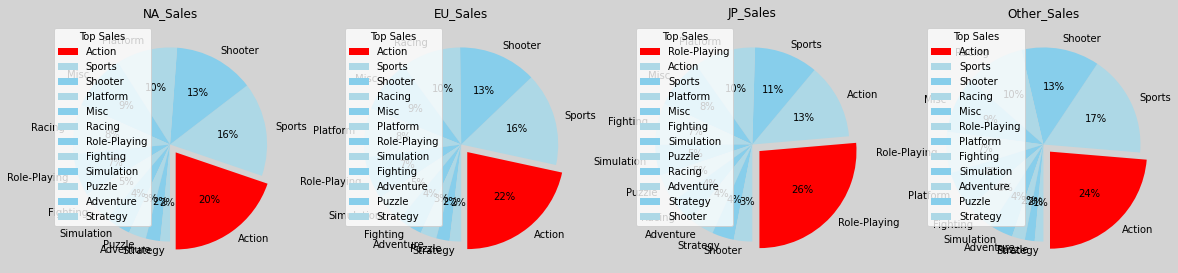

In [441]:

def ShowPie(isAll):
    
    fig, ax = plt.subplots(figsize = (20,12))
    ax.grid(True)
    fig.set_facecolor('lightgrey')

    for i,v in enumerate(sales):
        
        df_sorted = df_Genre.sort_values(by=v,ascending=False)[v]
        
        if isAll == False:
            df_sorted = df_sorted.head(3)

        #Series Ïùò Ïª¨ÎüºÏùÄ index
        mylabels = df_sorted.index
        # series Í∞úÏàò ÎßåÌÅº ÎÑ£Ïñ¥Ï§òÏïºÌï®. index ÏàúÏÑú. Í∞ÄÏö¥Îç∞ÏÑú ÏñºÎßåÌÅº Îñ®Ïñ¥Ìä∏Î¶¥Í≤ÉÏù∏Í∞Ä?
        myExplode = [0 for _ in mylabels] 
        myExplode[0] = 0.1
        
        myColor = [ 'skyblue' if i%2==0 else 'lightblue' for i,x in enumerate(myExplode)] 
        myColor[0] = 'red'

        plt.subplot(1, 4, i+1)
        plt.pie( df_sorted , autopct='%.0f%%',labels = mylabels,explode = myExplode, startangle = 270, colors=myColor )
        plt.title(v)
        plt.legend(title = "Top Sales",loc='upper left') 
        
    plt.show();

ShowPie(True)


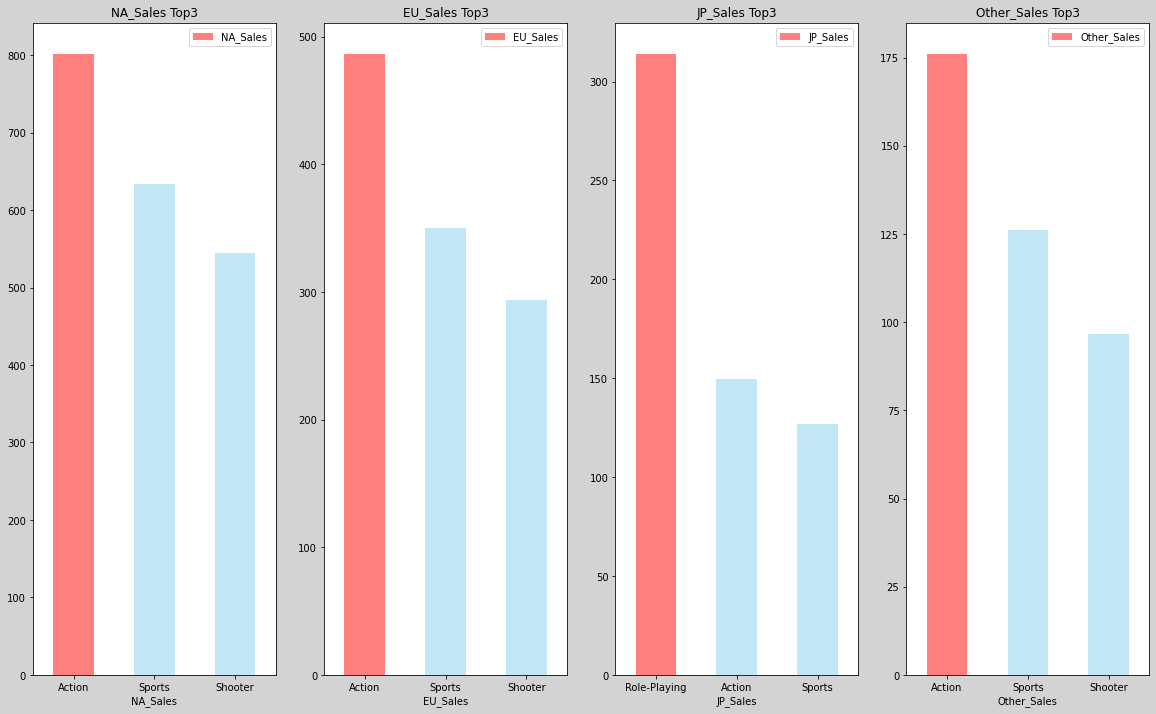

In [442]:

# ÏúÑ ÌëúÎ•º Î≥¥Î©¥ ÏßÄÏó≠Î≥Ñ Í∞Å Ïû•Î•¥Ïùò ÌåêÎß§ÎüâÏûÖÎãàÎã§. Í∞Å Ïû•Î•¥Ïùò Top3Í∞Ä Ï†ÑÏ≤¥Ïùò 50% Í∞ÄÍπåÏù¥ ÎêòÍ∏∞ÎïåÎ¨∏Ïóê 
# top3Ïùò ÌåêÎß§ÎüâÎßå Ï°∞ÌöåÌï¥ÎèÑ Ïñ¥Îñ§ Ïû•Î•¥Î•º ÏÑ†Ìò∏ÌïòÎäîÏßÄ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
# JPÏßÄÏó≠ÏùÄ Î°§ÌîåÎ†àÏûâÏùÑ ÏÑ†Ìò∏ÌïòÍ≥† Í∑∏Ïô∏Ïóê NA,EU,Other ÏßÄÏó≠ÏùÄ Ïï°ÏÖòÏùÑ ÏÑ†Ìò∏ÌïòÎäîÍ≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.


#ÏßÄÏó≠Î≥Ñ top3
fig, ax = plt.subplots(figsize = (20,12))
fig.set_facecolor('lightgrey')

for i,v in enumerate(sales):
    
    df_sorted = df_Genre.sort_values(by=v,ascending=False)[v].head(3)
    mylabels = df_sorted.index
    colors = ['skyblue' for _ in range(len(mylabels))]
    colors[0] = 'r'

    plt.subplot(1, 4, i+1)
    df_sorted.plot.bar(xlabel=v, title=v+' Top3', color=colors, rot=0, alpha=0.5,legend=True)#,xtick=100)
    #plt.bar( x= df_sorted.index, height=df_sorted.values,color=colors, alpha=0.5 ,width = .5)
    
plt.show()



In [597]:
 
## df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
# salesAll

df_gy = df1[ ['Year','Genre','Total_Sales']]
df_gy = df_gy.groupby(['Year','Genre']).sum()
df_gy = df_gy.sort_values( by='Year')
df_gy





Total_Sales
Year Genre                    
1980 Action               0.34
     Fighting             0.77
     Misc                 2.47
     Shooter              7.07
1981 Simulation           0.44
...                        ...
2016 Adventure            1.48
     Action              19.62
     Racing               1.62
2017 Action               0.01
     Role-Playing         0.04

[386 rows x 1 columns]

In [599]:
#Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò Ìä∏Î†åÎìúÍ∞Ä ÏûàÏùÑÍπå ? 
# - [ ]  Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ ÎÇòÎàÑÍ∏∞
# - [ ]  Ïó∞ÎèÑÎ≥Ñ ÎßéÏù¥ ÌåîÎ¶∞ Ïû•Î•¥ top 1 ÎΩëÍ∏∞
# - [ ]  ÎùºÏù∏ ÌîåÎ°Ø.  xÏ∂ï Ïó∞ÎèÑ yÏ∂ïÏùÄ ÌåêÎß§Îüâ, textÎ°ú Ï†úÏùº ÎßéÏù¥ ÌåîÎ¶∞ Ïû•Î•¥ Î≥¥Ïó¨Ï£ºÍ∏∞
# - [ ]  Ïó∞ÎèÑÎ≥ÑÎ°ú ÎßéÏù¥ ÌåîÎ¶∞ Ïû•Î•¥ ÏãúÍ∞ÅÌôî



#Î©ÄÌã∞Ïù∏Îç±Ïä§Î•º Year Ïù∏Îç±Ïä§Î°ú ÎßåÎì§Î†§Îäî ÏÇΩÏßà.. 
df_gy['Year2'] = df_gy.index
df_g1 = df_gy[ ['Year2','Total_Sales']]
df_g1 = df_g1.reset_index(drop=True)
df_g1



Year2  Total_Sales
0          (1980, Action)         0.34
1        (1980, Fighting)         0.77
2            (1980, Misc)         2.47
3         (1980, Shooter)         7.07
4      (1981, Simulation)         0.44
..                    ...          ...
381     (2016, Adventure)         1.48
382        (2016, Action)        19.62
383        (2016, Racing)         1.62
384        (2017, Action)         0.01
385  (2017, Role-Playing)         0.04

[386 rows x 2 columns]

In [600]:
#Î©ÄÌã∞ Ïù∏Îç±Ïä§ -> ÌäúÌîåÏùÑ ÎÇòÎà†ÏÑú Ïù∏Îç±Ïä§ Ìôî. 
years = []
genre = []

for v in df_g1['Year2']:
    years.append(v[0])
    genre.append(v[1])

df_g1['Year'] = years
df_g1['Genre'] = genre


df_g2 = df_g1[ ['Year','Genre','Total_Sales'] ]
df_g2.sort_values(by ='Year')
df_g2 = df_g2.reset_index(drop=True)
df_g2

Year         Genre  Total_Sales
0    1980        Action         0.34
1    1980      Fighting         0.77
2    1980          Misc         2.47
3    1980       Shooter         7.07
4    1981    Simulation         0.44
..    ...           ...          ...
381  2016     Adventure         1.48
382  2016        Action        19.62
383  2016        Racing         1.62
384  2017        Action         0.01
385  2017  Role-Playing         0.04

[386 rows x 3 columns]

In [638]:
# groupingÎêú YearÏùò Total_SalesÍ∞íÎì§ÏùÑ
# yearÎ≥Ñ max Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌï¥Î≤ÑÎ¶∞Îã§ Ï∫¨. transform(max)
df_g2_max = df_g2.groupby(by=['Year'])['Total_Sales'].transform(max)
#df_g2_max

# Í∏∞Ï°¥ dfÏùò Í∞íÍ≥º Í∞ôÏùÄ Ïó¥Îßå TrueÎ°ú ÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî FalseÎ°ú ÎßåÎìúÎäî series ÏÉùÏÑ± 
df_max_arr =  df_g2_max == df_g2['Total_Sales']
df_max_arr

# ÏµúÎåÄÍ∞í Ïó¥Îßå Í∏∞Ï°¥ dfÏóêÏÑú Í∞ÄÏ†∏Ïò®Îã§.
#year genre max_sales
df_ygm = df_g2[df_max_arr]

#ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥Î≥Ñ ÏµúÎåÄÌåêÎß§Îüâ ÌÖåÏù¥Î∏îÏù¥ ÎßåÎì§Ïñ¥ÏßÑÎã§. ÏßÄÏüàÏä§. 
df_ygm.reset_index(drop=True, inplace=True)
df_ygm


Year         Genre  Total_Sales
0   1980       Shooter         7.07
1   1981        Action        12.82
2   1982        Puzzle        10.04
3   1983      Platform         6.93
4   1984       Shooter        31.10
5   1985      Platform        41.67
6   1986        Action        13.74
7   1987      Fighting         5.42
8   1988      Platform        20.27
9   1989        Puzzle        37.69
10  1990      Platform        21.79
11  1991      Platform         7.63
12  1992      Fighting        15.23
13  1993      Platform        18.68
14  1994      Platform        28.76
15  1995      Platform        16.65
16  1996  Role-Playing        43.99
17  1997        Racing        31.56
18  1998        Sports        41.17
19  1999  Role-Playing        45.53
20  2000        Sports        38.11
21  2001        Action        54.18
22  2002        Action        82.20
23  2003        Action        66.21
24  2004        Action        74.28
25  2005        Action        83.92
26  2006        Sports       135.08
27  2007        Action       102.92
28  2008        Action       124.99
29  2009        Sports       137.05
30  2010        Action       115.08
31  2011        Action       116.56
32  2012        Action       107.67
33  2013        Action       106.87
34  2014        Action        98.37
35  2015        Action        66.03
36  2016        Action        19.62
37  2017  Role-Playing         0.04

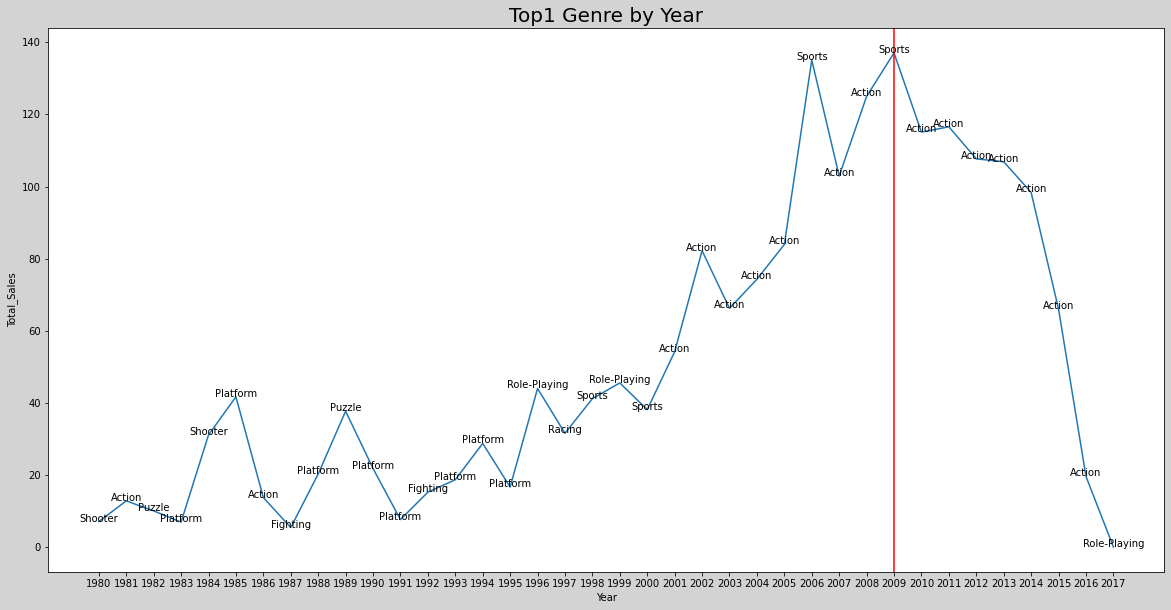

In [698]:
#df_ygm


fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('lightgrey')
g = sns.lineplot(x = 'Year', y='Total_Sales',data = df_ygm)


t_genre = df_ygm['Genre']
t_year =  df_ygm['Year']
t_maxSales = df_ygm['Total_Sales']

plt.xticks( ticks= t_year)
plt.title('Top1 Genre by Year', size='20')

for i,v in enumerate(t_maxSales):    
    g.text( x= t_year[i] ,y=v ,s= t_genre[i], ha='center',size=10) #,color='#000'
    #print(dfgenre[index])
    
maxTotal= df_ygm['Total_Sales'].max()
maxYear = df_ygm[df_ygm['Total_Sales'] == maxTotal].Year.values
maxYear = int(maxYear)
#print( maxYear)
plt.axline( (maxYear,0),(maxYear,1),color = 'red')



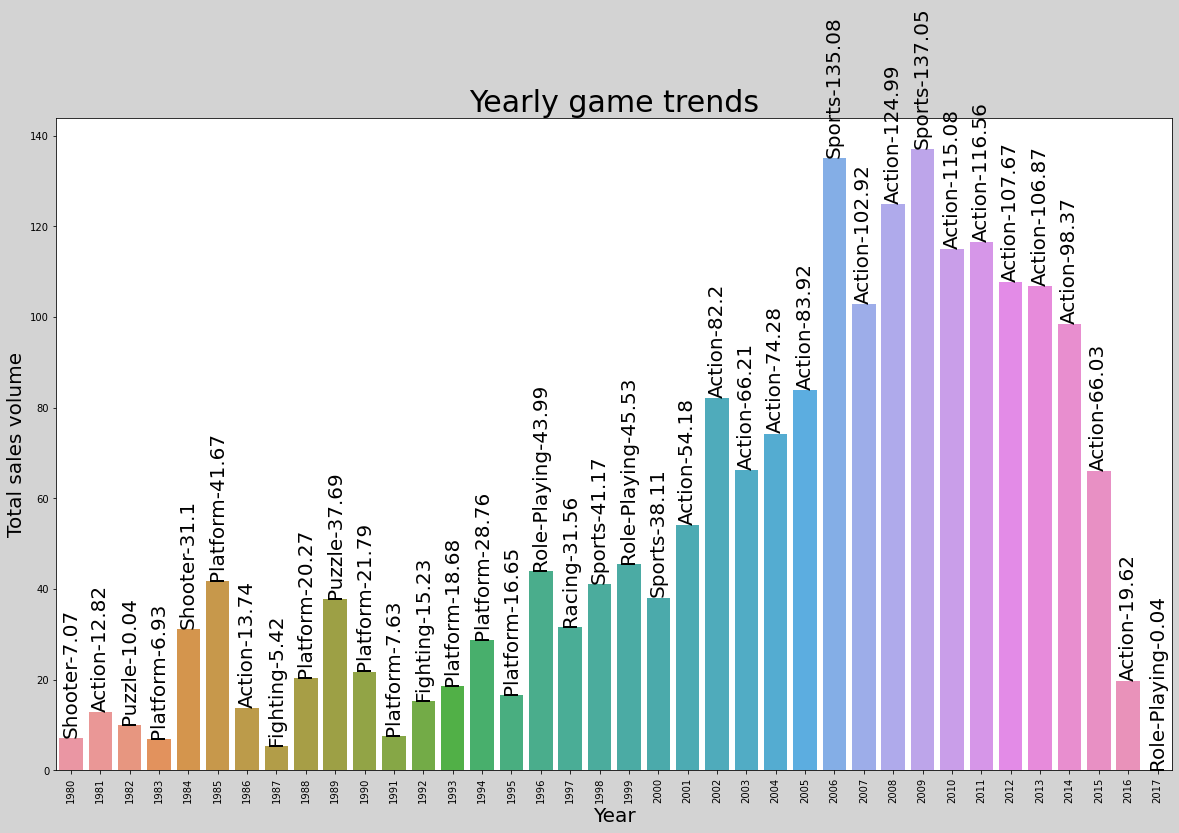

In [575]:

year_sale_dx = df1.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

fig = plt.figure(figsize=(20, 12))
fig.set_facecolor('lightgrey')
g = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max)

index = 0
for value in year_sale_max['Total_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()


In [470]:
year_sale_dx = df1.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale_dx
#year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
#year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
#year_sale

Year         Genre  Total_Sales
0    1980        Action         0.34
1    1980      Fighting         0.77
2    1980          Misc         2.47
3    1980       Shooter         7.07
4    1981        Action        12.82
..    ...           ...          ...
381  2016    Simulation         0.30
382  2016        Sports         9.61
383  2016      Strategy         0.41
384  2017        Action         0.01
385  2017  Role-Playing         0.04

[386 rows x 3 columns]

In [475]:
year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max)

0      7.07
1      7.07
2      7.07
3      7.07
4     12.82
       ... 
381   19.62
382   19.62
383   19.62
384    0.04
385    0.04
Name: Total_Sales, Length: 386, dtype: float64

In [506]:
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale
#print(type(year_sale))

0      False
1      False
2      False
3       True
4       True
       ...  
381    False
382    False
383    False
384    False
385     True
Name: Total_Sales, Length: 386, dtype: bool

In [563]:
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max.index = year_sale_max['Year']
year_sale_max.drop('Year', axis=1,inplace=True)
year_sale_max

#year_sale_max.plot.bar()#x='Year', y='Total_Sales')


#g = year_sale_max.plot.bar( xlabel='', title='Total_Sales',figsize=(12,10),legend=True)
# fig = sns.boxplot(x='Year', y='Total_Sales', data=year_sale_max)  #figsize=(20, 12))
# fig.set_facecolor('lightgrey')
#fig = plt.figure()

# index = 0
# for v in year_sale_max['Total_Sales']:
#     fig.text( index , v+1, 'G')

#plt.show()

# index = 0
# for value in year_sale_max['Total_Sales']:
#     g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
#     index += 1

# plt.title("Yearly game trends", fontsize=30)
# plt.xlabel("Year", fontsize=20)
# plt.ylabel("Total sales volume", fontsize=20)

# plt.xticks(rotation=90)
# plt.show()


Genre  Total_Sales
Year                           
1980       Shooter         7.07
1981        Action        12.82
1982        Puzzle        10.04
1983      Platform         6.93
1984       Shooter        31.10
1985      Platform        41.67
1986        Action        13.74
1987      Fighting         5.42
1988      Platform        20.27
1989        Puzzle        37.69
1990      Platform        21.79
1991      Platform         7.63
1992      Fighting        15.23
1993      Platform        18.68
1994      Platform        28.76
1995      Platform        16.65
1996  Role-Playing        43.99
1997        Racing        31.56
1998        Sports        41.17
1999  Role-Playing        45.53
2000        Sports        38.11
2001        Action        54.18
2002        Action        82.20
2003        Action        66.21
2004        Action        74.28
2005        Action        83.92
2006        Sports       135.08
2007        Action       102.92
2008        Action       124.99
2009        Sports       137.05
2010        Action       115.08
2011        Action       116.56
2012        Action       107.67
2013        Action       106.87
2014        Action        98.37
2015        Action        66.03
2016        Action        19.62
2017  Role-Playing         0.04

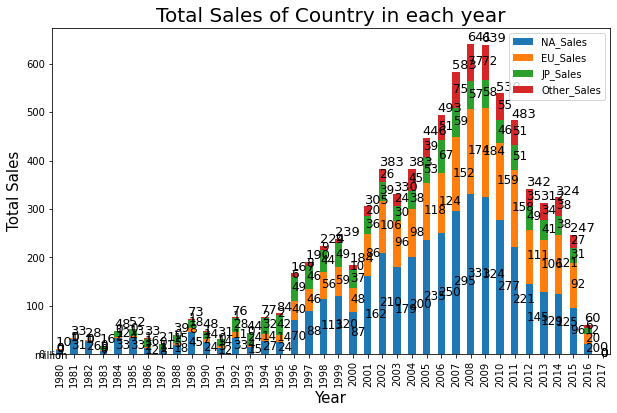

In [562]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


# Ïó∞ÎèÑ x Ïû•Î•¥ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
year_country = df1.groupby('Year').sum()
year_country = year_country.iloc[:,:-1]
yc_graph = year_country

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
yc_graph.plot.bar(stacked=True,figsize=(10,6))
plt.title('Total Sales of Country in each year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

# Ïó∞ÎèÑÎ≥Ñ Îß§Ï∂úÏï° ÌëúÏãú
for i in range(len(yc_graph.index)):
  plt.text(i-0.25,yc_graph.iloc[i,:].sum()+6,int(yc_graph.iloc[i,:].sum()), size = 13)

# YÏ∂ï Îã®ÏúÑ ÌëúÏãú
plt.text(-1.7,-10,s='million')

# ÏßÄÏó≠Î≥Ñ Îß§Ï∂úÏï° ÌëúÏãú
yc_ind = yc_graph.index
x = range(len(yc_ind))
yc_col = yc_graph.columns

for i in range(len(yc_ind)):
  sum = 0
  value = 0
  for j in range(len(yc_col)):
    sum += yc_graph.iloc[i,j]
    value =int(yc_graph.iloc[i,j])
    plt.text(x[i]-0.2,sum - (yc_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();

In [448]:

#Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑÏóê ÎåÄÌïú Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ÌîÑÎ°úÏÑ∏Ïä§



## Ï†ïÎ¶¨
> #ÏßÄÏó≠Ïóê Îî∞ÎùºÏÑú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Í∞Ä Îã§Î•ºÍπå? 
 - yes

> #Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò Ìä∏Î†åÎìúÍ∞Ä ÏûàÏùÑÍπå ?
 - ...

> #Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑÏóê ÎåÄÌïú Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ÌîÑÎ°úÏÑ∏Ïä§
 - ÏûëÏóÖÏ§ë.

### üî• FrameWork

blah blah

In [449]:
# code